In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
from pathlib import Path

BASE_DIR = Path(os.getcwd()).parent.parent

In [28]:
data_path = os.path.join(BASE_DIR, 'backend', 'data', 'processed', 'CLEAN_MERGED_DATASET.csv')
data = pd.read_csv(data_path)

In [29]:
data['date'] = pd.to_datetime(data['date'])

data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['hour'] = data['date'].dt.hour
data['day_of_week'] = data['date'].dt.dayofweek

data.drop(['date'], axis=1, inplace=True)

In [30]:
data.drop(['Unnamed: 0.1'], axis=1, inplace=True)
data.drop(['Unnamed: 0'], axis=1, inplace=True)

data.dropna(inplace=True)
data

,load,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,...,vapour_pressure_deficit,wind_speed_10m,wind_direction_10m,wind_gusts_10m,sunshine_duration,year,month,day,hour,day_of_week
0,22602.0,26.489000,90.945680,32.514164,0.1,1013.0,77.0,0.0,8.0,40.0,...,0.312947,4.394360,124.992096,23.400000,944.7518,2023.0,9.0,1.0,0.0,4.0
1,21934.0,26.088999,93.676630,32.000885,0.0,1013.6,100.0,0.0,4.0,100.0,...,0.213462,5.623380,140.194470,9.720000,0.0000,2023.0,9.0,1.0,1.0,4.0
2,20796.0,25.289000,97.644850,31.533634,0.0,1014.7,100.0,17.0,39.0,100.0,...,0.075826,2.902413,240.255200,10.440001,0.0000,2023.0,9.0,1.0,2.0,4.0
3,19475.0,25.239000,96.484320,31.321900,2.0,1015.1,86.0,0.0,11.0,84.0,...,0.112859,2.902413,352.875060,15.119999,0.0000,2023.0,9.0,1.0,3.0,4.0
4,17492.0,25.239000,97.062650,31.376713,0.1,1015.3,91.0,0.0,7.0,91.0,...,0.094293,2.968636,104.036270,5.760000,0.0000,2023.0,9.0,1.0,4.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17441,22988.0,31.838999,46.860985,36.763710,0.0,1019.4,99.0,0.0,0.0,99.0,...,2.502063,4.542994,33.690100,17.280000,3600.0000,2025.0,8.0,31.0,20.0,6.0
17442,22368.0,32.389000,46.281760,37.680405,0.0,1018.5,99.0,0.0,2.0,99.0,...,2.609007,4.278551,22.249071,16.199999,3600.0000,2025.0,8.0,31.0,21.0,6.0
17443,21900.0,32.989002,44.604340,38.213276,0.0,1017.7,97.0,1.0,13.0,96.0,...,2.782749,3.545589,23.962492,15.480000,3600.0000,2025.0,8.0,31.0,22.0,6.0
17444,21183.0,33.139000,43.682552,37.598270,0.0,1016.6,8.0,1.0,2.0,6.0,...,2.852978,2.930188,47.489597,14.759999,3600.0000,2025.0,8.0,31.0,23.0,6.0


In [31]:
from sklearn.model_selection import train_test_split

x = data.drop(['load'], axis=1)
y = data['load']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [33]:
train_data = x_train.join(y_train)

In [34]:
train_data

,temperature_2m,relative_humidity_2m,apparent_temperature,precipitation,pressure_msl,cloud_cover,cloud_cover_low,cloud_cover_mid,cloud_cover_high,et0_fao_evapotranspiration,...,wind_speed_10m,wind_direction_10m,wind_gusts_10m,sunshine_duration,year,month,day,hour,day_of_week,load
9112,29.639000,76.828186,35.773914,0.4,1012.8,49.0,15.0,35.0,9.0,0.471900,...,9.085988,236.309900,23.039999,3600.0,2024.0,9.0,18.0,19.0,2.0,25095.0
10449,20.939000,97.267140,23.745743,0.0,1015.7,100.0,0.0,0.0,100.0,0.000000,...,8.967541,79.592350,15.840000,0.0,2024.0,11.0,13.0,12.0,2.0,13952.0
3891,13.938999,95.237980,14.133915,0.0,1022.2,100.0,0.0,0.0,100.0,0.000000,...,5.634891,26.564985,9.360000,0.0,2024.0,2.0,12.0,5.0,0.0,12658.0
16482,33.339000,54.551693,39.136208,0.0,1020.9,100.0,7.0,10.0,100.0,0.630536,...,7.587806,202.306260,23.400000,3600.0,2025.0,7.0,22.0,21.0,1.0,26205.0
2279,20.289000,55.678020,19.837976,0.0,1017.6,100.0,0.0,40.0,100.0,0.053121,...,5.495161,328.392550,18.359999,0.0,2023.0,12.0,7.0,1.0,3.0,14661.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14753,31.289000,52.247158,37.004196,0.1,1017.0,63.0,10.0,27.0,46.0,0.640633,...,2.291026,224.999900,15.840000,3600.0,2025.0,5.0,11.0,20.0,6.0,21041.0
14511,28.838999,49.237823,31.940926,0.0,1020.0,0.0,0.0,0.0,0.0,0.495780,...,2.817445,153.435010,16.560000,3600.0,2025.0,5.0,1.0,18.0,3.0,19471.0
3845,9.688999,83.846560,7.072997,0.0,1023.5,11.0,0.0,0.0,11.0,0.008595,...,12.819235,51.842735,24.119999,0.0,2024.0,2.0,10.0,7.0,5.0,9593.0
12572,28.338999,50.848663,30.315037,0.0,1019.5,67.0,42.0,6.0,43.0,0.401251,...,4.198285,210.963680,14.759999,3600.0,2025.0,2.0,9.0,23.0,6.0,18759.0


<Axes: >

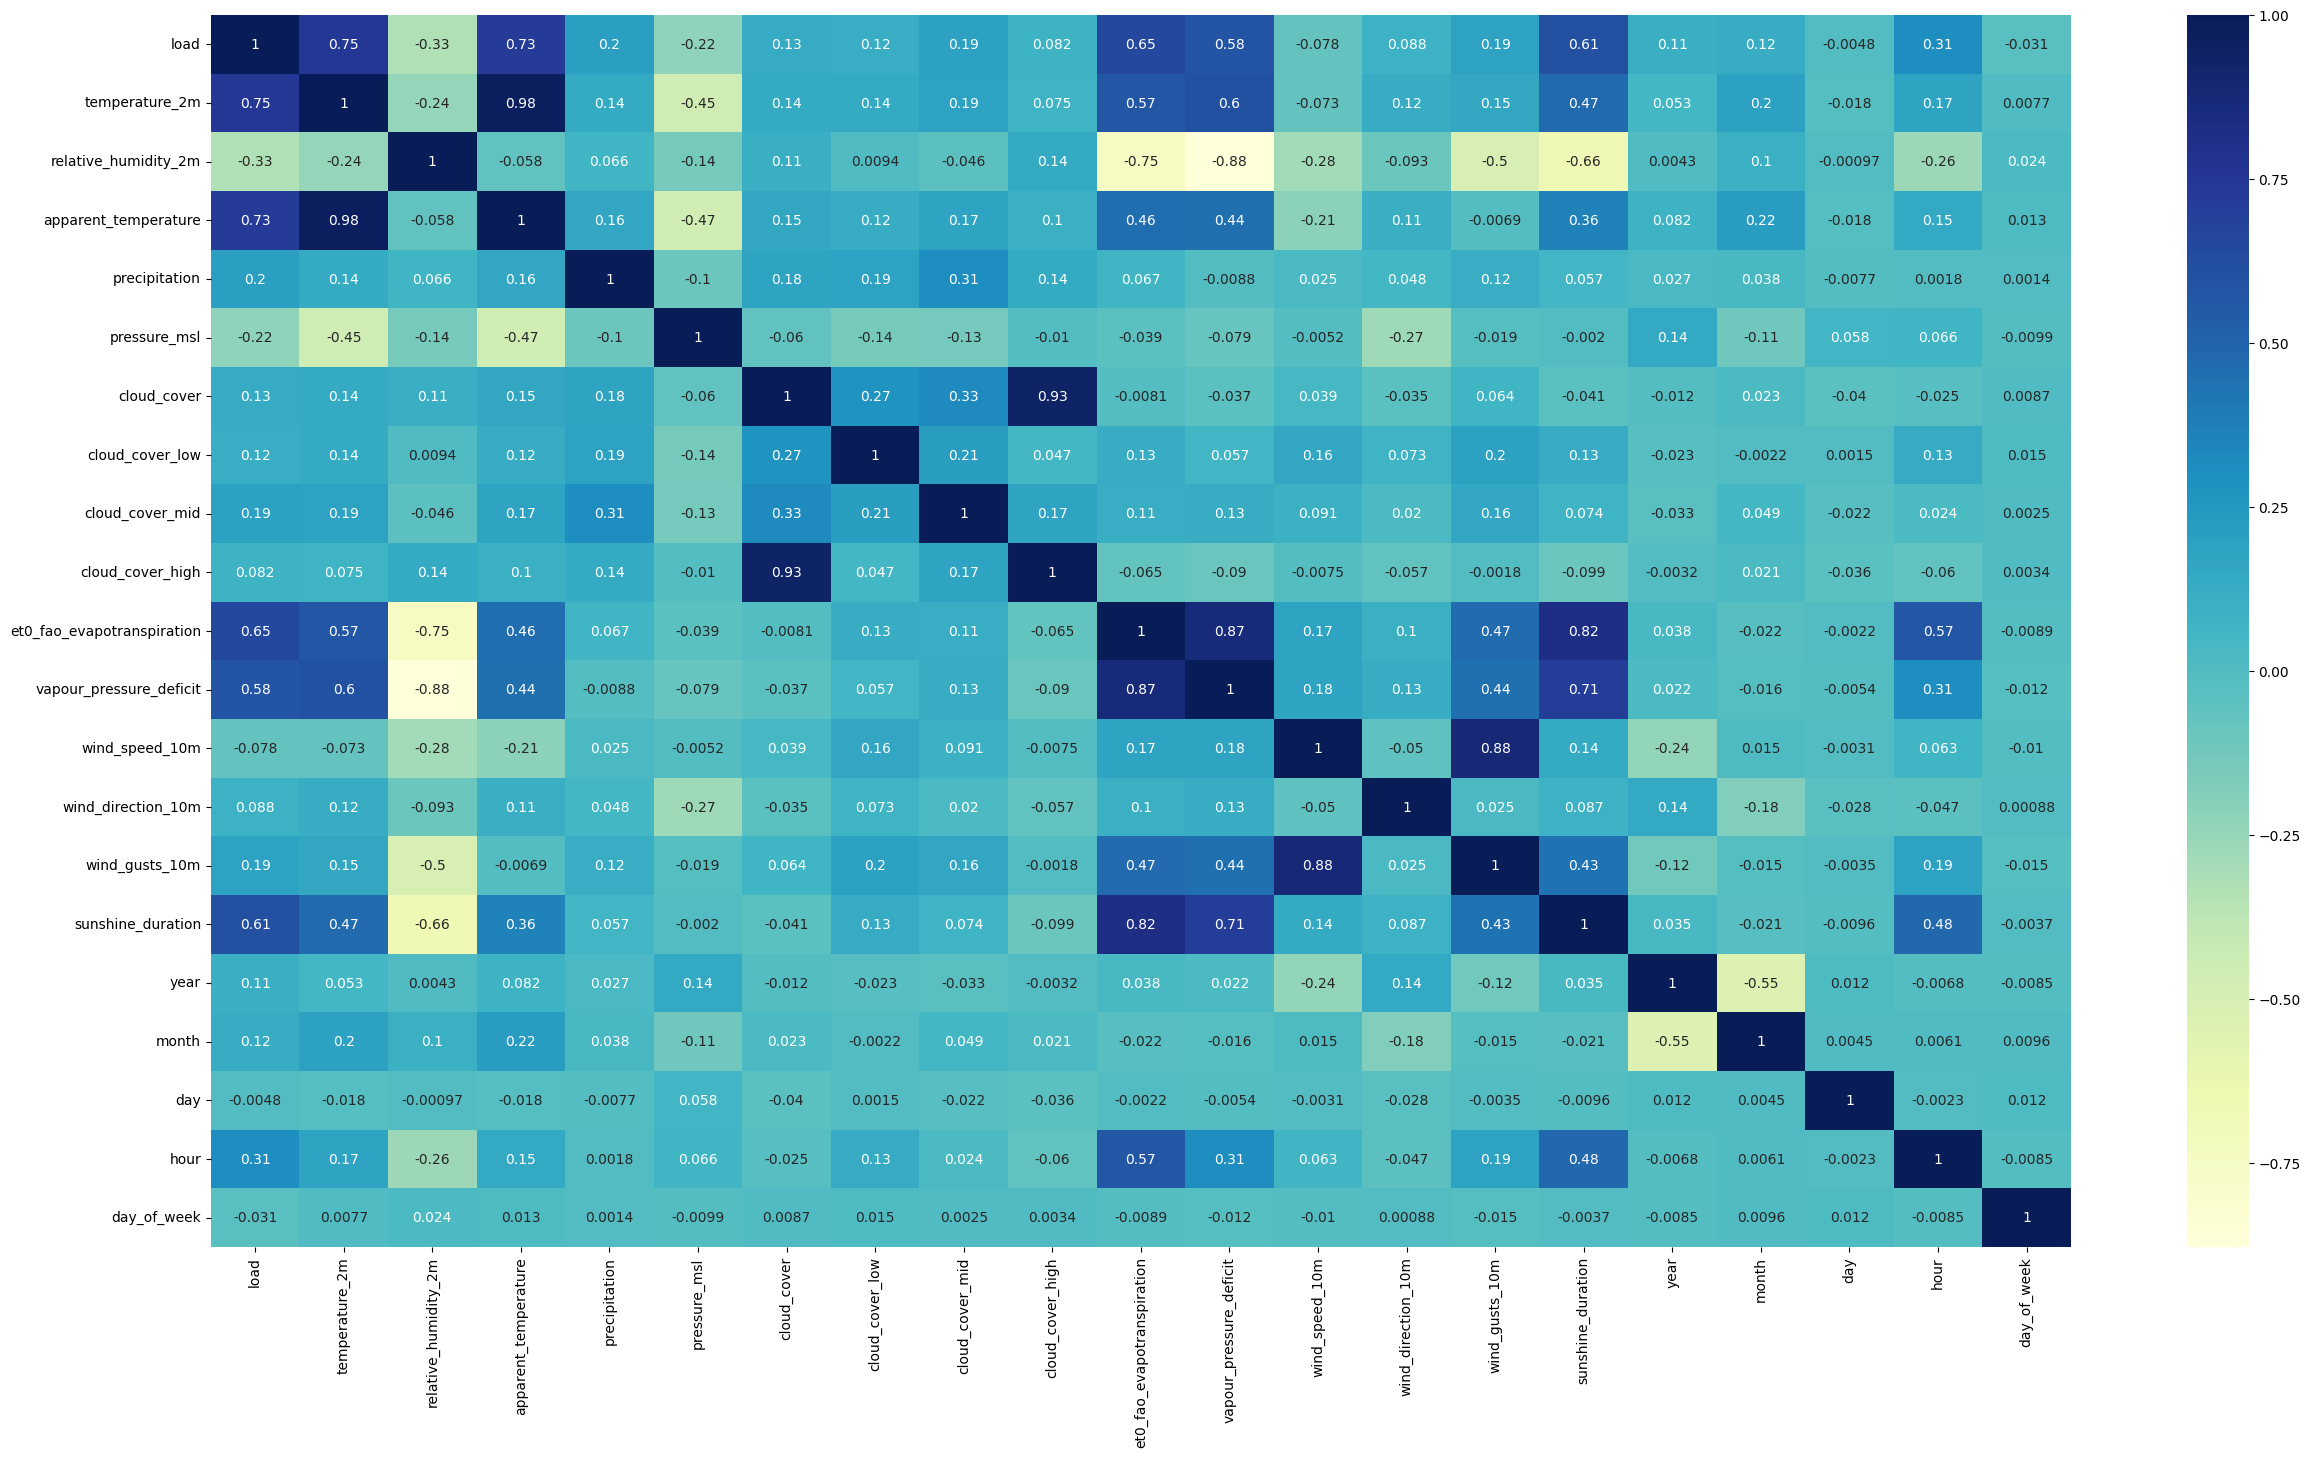

In [35]:
plt.figure(figsize=(30, 16))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

x_train, y_train = train_data.drop(['load'], axis=1), train_data['load']

scaler = StandardScaler()
x_train_s = scaler.fit_transform(x_train)
x_test_s = scaler.transform(x_test)

reg = LinearRegression()
reg.fit(x_train_s, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [37]:
reg.score(x_test_s, y_test)

0.7287294365799106

In [38]:
from sklearn.metrics import mean_squared_error

y_pred = reg.predict(x_test_s)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))

rmse

np.float64(2269.4433597891853)

In [39]:
y_baseline_pred = y_test.shift(1).fillna(y_train.iloc[-1])
baseline_rmse = np.sqrt(mean_squared_error(y_test, y_baseline_pred))

baseline_rmse

np.float64(6190.441184658543)